In [2]:
!pip install openpyxl

In [4]:
import pandas as pd
import openpyxl
import numpy as np
from scipy.stats import skewtest, shapiro, ttest_rel, ttest_ind, wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt

In [7]:
# %pip install --upgrade scipy --user

In [5]:
wb = openpyxl.load_workbook('./Q3-Dataset.xlsx')
sheet = wb.active
data = []

for row in sheet.iter_rows(values_only=True):
    data.append(row)

df = pd.DataFrame(data)

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,None,None,Participant,P1,P2,P3,P4,P5,P6,P7,...,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19
1,Smartphone,Displayed Image,Gender,M,M,M,F,M,M,M,...,F,F,F,M,F,F,F,M,M,F
2,S1,Image1,None,80,40,70,39,91,90,64,...,40,49,30,64,57,50,76,50,74,60
3,S1,Image2,None,70,50,90,75,85,71,76,...,40,46,40,54,50,60,57,40,82,40
4,S1,Image3,None,86,50,70,88,83,90,68,...,46,50,60,92,75,60,52,50,95,37
5,S1,Image4,None,83,50,71,57,96,90,56,...,60,48,70,81,70,67,79,60,85,60
6,S1,Image5,None,69,47,80,63,84,100,53,...,39,49,50,71,60,65,70,70,93,60
7,S1,Image6,None,59,59,50,66,92,90,46,...,49,51,50,81,61,57,89,80,88,51
8,S1,Image7,None,34,70,35,8,78,50,8,...,45,50,62,51,43,40,19,66,78,40
9,S1,Image8,None,30,62,13,59,60,100,12,...,69,48,82,54,47,50,30,65,85,42


In [19]:
rtf = df.loc[1]

# Creates Male dataset, mdf
filtered_M = rtf[rtf=='M'].index
male_df = df[filtered_M].drop([0,1])

# Creates Female dataset, fdf
filtered_F = rtf[rtf=='F'].index
female_df = df[filtered_F].drop([0,1])

#Creates S1 dataset, S1_df
S1_df = df.iloc[2:26, 3:22]

#Creates S2 dataset, S2_df
S2_df = df.iloc[26:50, 3:22]

In [20]:
male_df

,3,4,5,7,8,9,11,15,19,20
2,80,40,70,91,90,64,73,64,50,74
3,70,50,90,85,71,76,52,54,40,82
4,86,50,70,83,90,68,80,92,50,95
5,83,50,71,96,90,56,91,81,60,85
6,69,47,80,84,100,53,64,71,70,93
7,59,59,50,92,90,46,74,81,80,88
8,34,70,35,78,50,8,60,51,66,78
9,30,62,13,60,100,12,70,54,65,85
10,70,67,54,95,100,67,40,84,60,64
11,41,100,23,91,100,15,50,70,70,67


In [21]:
female_df

,6,10,12,13,14,16,17,18,21
2,39,80,40,49,30,57,50,76,60
3,75,56,40,46,40,50,60,57,40
4,88,79,46,50,60,75,60,52,37
5,57,79,60,48,70,70,67,79,60
6,63,71,39,49,50,60,65,70,60
7,66,58,49,51,50,61,57,89,51
8,8,53,45,50,62,43,40,19,40
9,59,45,69,48,82,47,50,30,42
10,51,48,66,51,78,51,60,50,60
11,25,47,89,71,72,55,70,50,50


In [8]:
S1_df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
2,80,40,70,39,91,90,64,80,73,40,49,30,64,57,50,76,50,74,60
3,70,50,90,75,85,71,76,56,52,40,46,40,54,50,60,57,40,82,40
4,86,50,70,88,83,90,68,79,80,46,50,60,92,75,60,52,50,95,37
5,83,50,71,57,96,90,56,79,91,60,48,70,81,70,67,79,60,85,60
6,69,47,80,63,84,100,53,71,64,39,49,50,71,60,65,70,70,93,60
7,59,59,50,66,92,90,46,58,74,49,51,50,81,61,57,89,80,88,51
8,34,70,35,8,78,50,8,53,60,45,50,62,51,43,40,19,66,78,40
9,30,62,13,59,60,100,12,45,70,69,48,82,54,47,50,30,65,85,42
10,70,67,54,51,95,100,67,48,40,66,51,78,84,51,60,50,60,64,60
11,41,100,23,25,91,100,15,47,50,89,71,72,70,55,70,50,70,67,50


In [29]:
S2_df 

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
26,93,80,91,81,95,100,79,64,81,51,50,69,87,70,67,49,30,85,80
27,72,60,89,91,96,96,76,90,91,51,50,70,72,66,60,90,70,97,55
28,85,70,70,76,93,100,51,81,87,69,50,50,87,77,67,85,50,91,60
29,98,80,90,94,94,100,65,73,68,71,49,80,70,59,60,54,70,95,81
30,81,46,50,71,94,92,40,66,82,70,42,60,93,62,60,41,90,23,70
31,77,90,90,99,93,100,55,90,81,69,52,89,100,81,70,99,70,95,70
32,43,78,68,52,96,90,70,54,81,73,70,70,71,88,70,70,70,84,40
33,44,100,86,60,92,100,91,49,69,72,81,95,80,71,70,70,66,89,50
34,70,71,78,64,95,90,67,45,70,90,90,97,73,77,90,70,70,97,70
35,40,70,84,79,95,80,54,48,50,80,88,76,80,64,70,80,75,84,70


In [23]:
#Create male dataset for S1 and S2
male_df_S1 = mdf.iloc[:24,]
male_df_S2 = mdf.iloc[24:,]

#Create female dataset for S1 and S2
female_df_S1 = fdf.iloc[:24,]
female_df_S2 = fdf.iloc[24:,]

In [24]:
male_df_S1

,3,4,5,7,8,9,11,15,19,20
2,80,40,70,91,90,64,73,64,50,74
3,70,50,90,85,71,76,52,54,40,82
4,86,50,70,83,90,68,80,92,50,95
5,83,50,71,96,90,56,91,81,60,85
6,69,47,80,84,100,53,64,71,70,93
7,59,59,50,92,90,46,74,81,80,88
8,34,70,35,78,50,8,60,51,66,78
9,30,62,13,60,100,12,70,54,65,85
10,70,67,54,95,100,67,40,84,60,64
11,41,100,23,91,100,15,50,70,70,67


In [25]:
male_df_S2

,3,4,5,7,8,9,11,15,19,20
26,93,80,91,95,100,79,81,87,30,85
27,72,60,89,96,96,76,91,72,70,97
28,85,70,70,93,100,51,87,87,50,91
29,98,80,90,94,100,65,68,70,70,95
30,81,46,50,94,92,40,82,93,90,23
31,77,90,90,93,100,55,81,100,70,95
32,43,78,68,96,90,70,81,71,70,84
33,44,100,86,92,100,91,69,80,66,89
34,70,71,78,95,90,67,70,73,70,97
35,40,70,84,95,80,54,50,80,75,84


In [26]:
female_df_S1

,6,10,12,13,14,16,17,18,21
2,39,80,40,49,30,57,50,76,60
3,75,56,40,46,40,50,60,57,40
4,88,79,46,50,60,75,60,52,37
5,57,79,60,48,70,70,67,79,60
6,63,71,39,49,50,60,65,70,60
7,66,58,49,51,50,61,57,89,51
8,8,53,45,50,62,43,40,19,40
9,59,45,69,48,82,47,50,30,42
10,51,48,66,51,78,51,60,50,60
11,25,47,89,71,72,55,70,50,50


In [28]:
female_df_S2

,6,10,12,13,14,16,17,18,21
26,81,64,51,50,69,70,67,49,80
27,91,90,51,50,70,66,60,90,55
28,76,81,69,50,50,77,67,85,60
29,94,73,71,49,80,59,60,54,81
30,71,66,70,42,60,62,60,41,70
31,99,90,69,52,89,81,70,99,70
32,52,54,73,70,70,88,70,70,40
33,60,49,72,81,95,71,70,70,50
34,64,45,90,90,97,77,90,70,70
35,79,48,80,88,76,64,70,80,70


In [36]:
#mdf_S1, mdf_S2, fdf_S1, fdf_S2
male_df_S1 = mdf_S1.set_index(mdf_S1.columns[0]).reset_index()
male_df_S2 = mdf_S2.set_index(mdf_S2.columns[0]).reset_index()
female_df_S1 = fdf_S1.set_index(fdf_S1.columns[0]).reset_index()
female_df_S2 = fdf_S2.set_index(fdf_S2.columns[0]).reset_index()
S1_df = S1_df.set_index(S1_df.columns[0]).reset_index()
S2_df = S2_df.set_index(S2_df.columns[0]).reset_index()

In [37]:
dataframes = {
    'male_df_S1' : male_df_S1,
    'female_df_S1' : female_df_S1,
    'male_df_S2' : male_df_S2,
    'female_df_S2' : female_df_S2,
    'S1_df' : S1_df, 
    'S2_df' : S2_df
}
for dataframe in dataframes:
    print(dataframe, dataframes[dataframe].values.mean())
    

male_df_S1 64.47083333333333
female_df_S1 54.032407407407405
male_df_S2 76.54583333333333
female_df_S2 68.29629629629629
S1_df 59.526315789473685
S2_df 72.63815789473684


In [31]:
# Tests for Normality

print('H0 is assumption of Normality')
alpha = 0.05

for name, dataframe in dataframes.items():
    stat, p = shapiro(dataframe.values)
    print('For {}, Statistics={:.3f}, p={:.5f}'.format(name,stat,p))
    if p > alpha:
        print('{} looks Normal, do not reject H0'.format(name))
    else:
        print('{} is not Normal, reject H0'.format(name))
    print('***********************\n')
    

H0 is assumption of Normality
For male_df_S1, Statistics=0.973, p=0.00017
male_df_S1 is not Normal, reject H0
***********************

For female_df_S1, Statistics=0.988, p=0.05975
female_df_S1 looks Normal, do not reject H0
***********************

For male_df_S2, Statistics=0.920, p=0.00000
male_df_S2 is not Normal, reject H0
***********************

For female_df_S2, Statistics=0.977, p=0.00123
female_df_S2 is not Normal, reject H0
***********************

For S1_df, Statistics=0.986, p=0.00028
S1_df is not Normal, reject H0
***********************

For S2_df, Statistics=0.960, p=0.00000
S2_df is not Normal, reject H0
***********************



## Note between mdf and fdf, its independent, but its paired between S1 and S2 since were comparing by image

## We do three comparisons for the tests
> * One, we ask to compare between S1 and S2, dependent data since same people doing it
>> Since dependent, one sample case by taking S1-S2.
> * Two, for the impact of gender of comparison, do Two way ANOVA
> * Three, for t-tests on male and female, use mdf_S1, mdf_S2, fdf_S1, fdf_S2 and test for normality. If its BOTH normal, run 
```python

from scipy.stats import ttest_rel
mdf_t, mdf_p = ttest_rel(mdf_S1, mdf_S2)
fdf_t, fdf_p = ttest_rel(fdf_S1, fdf_S2)

if male_p < alpha:
    print('The difference in display quality ratings between S1 and S2 for male participants is significant')
```
>> etc. Otherwise, run
```python

from scipy.stats import wilcoxon
mdf_t, mdf_p = wilcoxon(mdf_S1, mdf_S2)
fdf_t, fdf_p = wilcoxon(fdf_S1, fdf_S2)

if male_p < alpha:
    print('The difference in display quality ratings between S1 and S2 for male participants is significant')
```
>> etc. 

## paired normal, ttest_rel
## paired not normal, wilcoxon
## independent normal, ttest_ind
## independent not normal, mwu

In [38]:
# Means values for S1 and S2

print(S1_df.values.mean())
print(S2_df.values.mean())


59.526315789473685
72.63815789473684


In [39]:
# Since the same participants rate the same images on both phones, they are dependent and paired.
phone_diff = S1_df - S2_df
stat, p = shapiro(phone_diff.values)
print('H0 is assumption of Normality\n*******************')
print('For difference between S1 and S2, Statistics={:.3f}, p={:.5f}'.format(stat,p))
if p > alpha:
    print('The difference of S1 and S2 looks Normal, do not reject H0')
else:
    print('The difference of S1 and S2 is not Normal, reject H0')
print('***********************\n')

phone_diff = phone_diff.astype(float)
phone_diff_data = phone_diff.values.flatten()
stat, p = skewtest(phone_diff_data)
print('H0 is assumption of Symmetricity\n*******************')
print('For difference between S1 and S2, Statistics={:.3f}, p={:.5f}'.format(float(stat),float(p)))
if p > alpha:
    print('The difference of S1 and S2 looks symmetric, do not reject H0')
else:
    print('The difference of S1 and S2 is not symmetric, reject H0')
print('***********************\n')

stat, p = wilcoxon(phone_diff_data, alternative='two-sided')
print('H0 is equality of means\n*******************')
print('For difference of means between S1 and S2, Statistics={:.3f}, p={:.5f}'.format(float(stat),float(p)))
if p > alpha:
    print('The difference of means of S1 and S2 is not significant, do not reject H0')
else:
    print('The difference of means of S1 and S2 significant, reject H0')
print('***********************\n')


H0 is assumption of Normality
*******************
For difference between S1 and S2, Statistics=0.975, p=0.00000
The difference of S1 and S2 is not Normal, reject H0
***********************

H0 is assumption of Symmetricity
*******************
For difference between S1 and S2, Statistics=-3.100, p=0.00193
The difference of S1 and S2 is not symmetric, reject H0
***********************

H0 is equality of means
*******************
For difference of means between S1 and S2, Statistics=11731.500, p=0.00000
The difference of means of S1 and S2 significant, reject H0
***********************



Confidence interval and mean for S1: (51.443,59.526,67.610)
Confidence interval and mean for S2: (65.692,72.638,79.584)


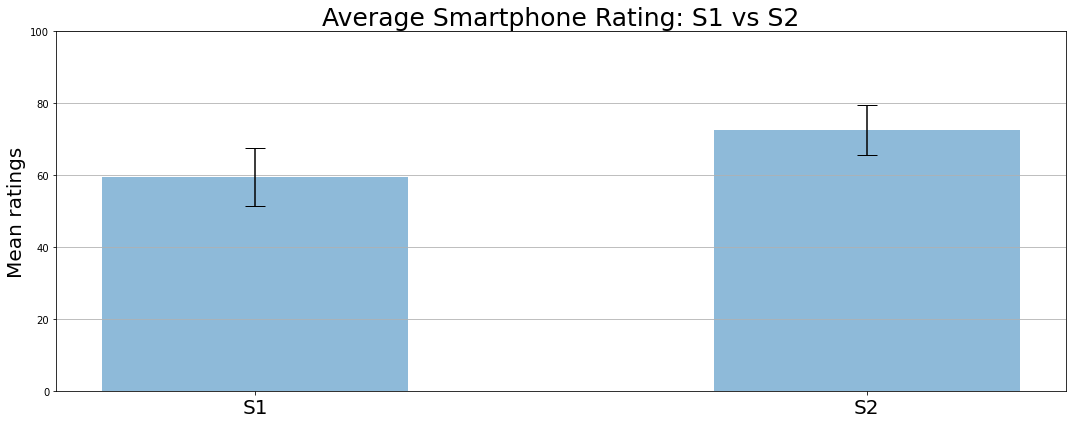

In [40]:
from scipy.stats import t
mean_S1 = np.mean(S1_df.values)
sd_S1 = np.std(S1_df.values)
n1 = len(S1_df)
# t1 = t.ppf(0.975, n1-1)
sem1 = sd_S1 / np.sqrt(n1)
# m1 = t1 * sem1
m1 = 1.96 * sem1
# S1_CI = [mean_S1 - m1, mean_S1 + m1]

mean_S2 = np.mean(S2_df.values)
sd_S2 = np.std(S2_df.values)
n2 = len(S2_df)
# t2 = t.ppf(0.975, n2-1)
sem2 = sd_S2 / np.sqrt(n2)
# m2 = t2 * sem2
m2 = 1.96 * sem2
# S2_CI = [mean_S2 - m2, mean_S2 + m2]

print('Confidence interval and mean for S1: ({:.3f},{:.3f},{:.3f})'.format(S1_CI[0],mean_S1,S1_CI[1]))
print('Confidence interval and mean for S2: ({:.3f},{:.3f},{:.3f})'.format(S2_CI[0],mean_S2,S2_CI[1]))

fig, ax = plt.subplots(figsize=(15,6))
ind = np.arange(2) # the x locations for the data groups
width = 0.5 # the width of the bars
ax.bar(
    ind, [mean_S1, mean_S2],
    yerr = [m1, m2],
    align = 'center',
    alpha = 0.5,
    ecolor = 'black',
    capsize = 10,
    width = 0.5
)

ax.set_ylim([0,100])
ax.set_ylabel('Mean ratings', fontsize = 20)
ax.set_xticks(ind)
ax.set_xticklabels(['S1','S2'], fontsize = 20)
ax.set_title('Average Smartphone Rating: S1 vs S2', fontsize = 25)
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# plt.bar(ind, [mean_S1, mean_S2], width, color='r', yerr=[S1_CI, S2_CI])
# plt.ylabel('Rating Score', fontsize=30)
# xtickloc = ind
# xticklabels = ['S1', 'S2']
# plt.xticks(xtickloc, xticklabels, rotation='horizontal', fontsize=20)
# plt.title('Average smartphone rating: S1 vs. S2', fontsize=30)
# plt.xlim([-0.5,1.5])
# plt.ylim([40,100])
# plt.show()

In [ ]:
# Tests for Symmetry

# Probably useless, idk

# mdf_S1_shifted = mdf_S1 - np.mean(mdf_S1.values)
# mdf_S2_shifted = mdf_S2 - np.mean(mdf_S2.values)
# fdf_S1_shifted = fdf_S1 - np.mean(fdf_S1.values)
# fdf_S2_shifted = fdf_S2 - np.mean(fdf_S2.values)
# S1_shifted = S1_df - np.mean(S1_df.values)
# S2_shifted = S2_df - np.mean(S2_df.values)

# shifted_dataframes = {
#    'mdf_S1_shifted' : mdf_S1_shifted,
#     'fdf_S1_shifted' : fdf_S1_shifted,
#     'mdf_S2_shifted' : mdf_S2_shifted,
#    'fdf_S2_shifted' : fdf_S2_shifted,
#      'S1_shifted' : S1_shifted, 
#     'S2_shifted' : S2_shifted
# }
# 
# for key, dataframe in shifted_dataframes.items():
#     dataframe = dataframe.astype(float)
#     stat, p = skewtest(dataframe.values)
#     print(key, p)


mdf_S1_shifted [0.31008431 0.96328896 0.34067512 0.39121215 0.87076164 0.0941402
 0.91535871 0.84561167 0.4879029  0.01093089]
fdf_S1_shifted [0.94567767 0.35702662 0.46836233 0.0157495  0.2436988  0.6982209
 0.0774879  0.81494463 0.31474653]
mdf_S2_shifted [3.94279340e-02 8.80973137e-01 7.01974881e-03 1.35870720e-01
 1.66754358e-01 1.66660050e-01 1.23581153e-02 9.14316241e-01
 1.13757937e-01 1.65001975e-05]
fdf_S2_shifted [0.08686593 0.45299423 0.87561402 0.24524807 0.730583   0.24425386
 0.69831241 0.31644465 0.48492939]
S1_shifted [0.31008431 0.96328896 0.34067512 0.94567767 0.39121215 0.87076164
 0.0941402  0.35702662 0.91535871 0.46836233 0.0157495  0.2436988
 0.84561167 0.6982209  0.0774879  0.81494463 0.4879029  0.01093089
 0.31474653]
S2_shifted [3.94279340e-02 8.80973137e-01 7.01974881e-03 8.68659268e-02
 1.35870720e-01 1.66754358e-01 1.66660050e-01 4.52994232e-01
 1.23581153e-02 8.75614023e-01 2.45248068e-01 7.30583004e-01
 9.14316241e-01 2.44253858e-01 6.98312411e-01 3.16444

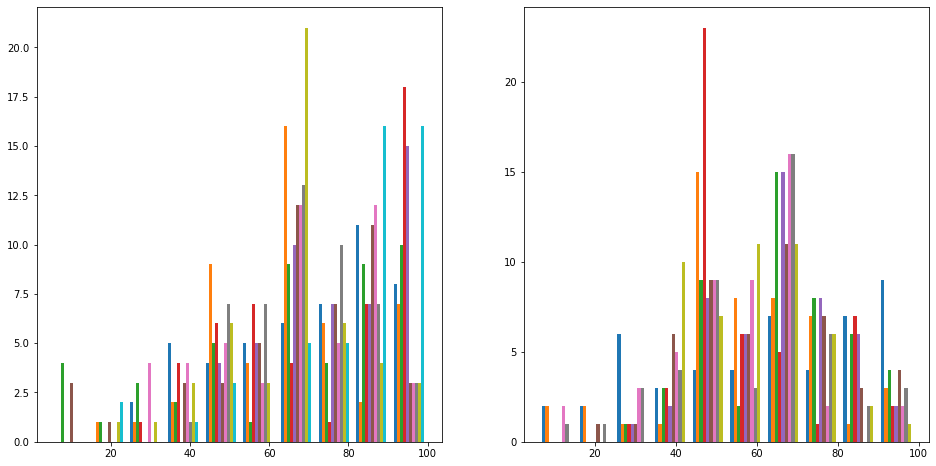

In [16]:
# Little test having a comparison between male data distribution and female data distribution

# Change bin count and colors to split by image and smartphone

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
# ax1.hist(mdf.mean())
# ax2.hist(fdf.mean())
ax1.hist(mdf)
ax2.hist(fdf)
plt.show()

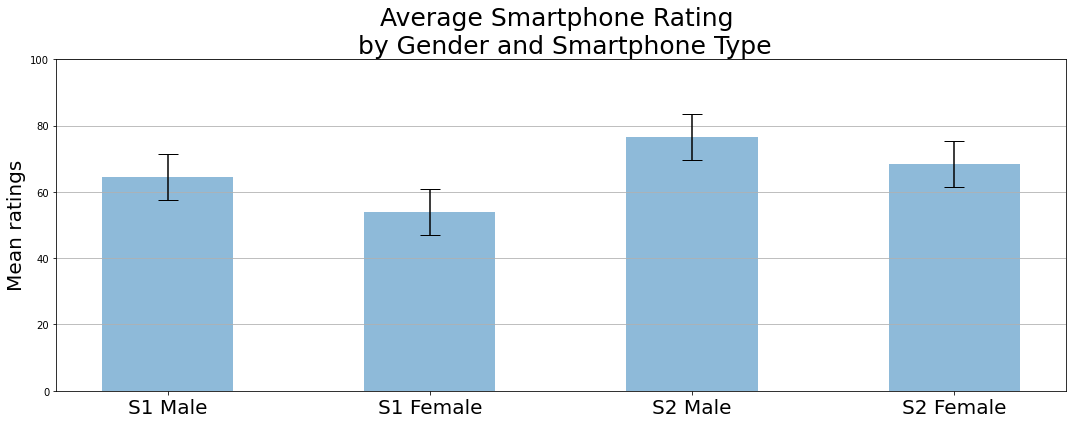

In [94]:
mean_male_df_S1 = np.mean(male_df_S1.values)
sd_male_df_S1 = np.std(male_df_S1.values)
n1 = len(S1_df)
# t1 = t.ppf(0.975, n1-1)
sem_male_S1 = sd_S1 / np.sqrt(n1)
# m1 = t1 * sem1
m_male_S1 = 1.96 * sem1
# S1_CI = [mean_S1 - m1, mean_S1 + m1]

mean_female_df_S1 = np.mean(female_df_S1.values)
sd_female_df_S1 = np.std(female_df_S1.values)
n1 = len(S1_df)
# t1 = t.ppf(0.975, n1-1)
sem_female_S1 = sd_female_df_S1 / np.sqrt(n1)
# m1 = t1 * sem1
m_female_S1 = 1.96 * sem1
# S1_CI = [mean_S1 - m1, mean_S1 + m1]


mean_male_df_S2 = np.mean(male_df_S2.values)
sd_male_df_S2 = np.std(male_df_S2.values)
n1 = len(S2_df)
# t1 = t.ppf(0.975, n1-1)
sem_male_S2 = sd_S2 / np.sqrt(n1)
# m1 = t1 * sem1
m_male_S2 = 1.96 * sem1
# S1_CI = [mean_S1 - m1, mean_S1 + m1]

mean_female_df_S2 = np.mean(female_df_S2.values)
sd_female_df_S2 = np.std(female_df_S2.values)
n1 = len(S2_df)
# t1 = t.ppf(0.975, n1-1)
sem_female_S2 = sd_S2 / np.sqrt(n1)
# m1 = t1 * sem1
m_female_S2 = 1.96 * sem1
# S1_CI = [mean_S1 - m1, mean_S1 + m1]


fig, ax = plt.subplots(figsize=(15,6))
ind = np.arange(4) # the x locations for the data groups
width = 0.5 # the width of the bars
ax.bar(
    ind, [mean_male_df_S1, mean_female_df_S1, mean_male_df_S2, mean_female_df_S2],
    yerr = [m_male_S1, m_female_S1, m_male_S2, m_female_S2],
    align = 'center',
    alpha = 0.5,
    ecolor = 'black',
    capsize = 10,
    width = 0.5
)

# ax.set_ylim([0,100])
# ax.set_ylabel('Mean ratings', fontsize = 20)
# ax.set_xticks(ind)
# ax.set_xticklabels(['S1','S2'], fontsize = 20)
# ax.set_title('Average Smartphone Rating: S1 vs S2', fontsize = 25)
# ax.yaxis.grid(True)
# plt.tight_layout()
# plt.show()

ax.set_ylim([0, 100])
ax.set_ylabel('Mean ratings', fontsize = 20)
ax.set_xticks(ind)
ax.set_xticklabels(['S1 Male',  'S1 Female', 'S2 Male', 'S2 Female',], fontsize = 20)
ax.set_title('Average Smartphone Rating \n by Gender and Smartphone Type', fontsize = 25)
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
